<a href="https://colab.research.google.com/github/act-moises/diplomado/blob/main/mod_6_limpieza_y_anl%C3%A1lisis_discriminante_trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos bosque clasificador de sklearn

#Analisis de discriminante lineal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Analisis de componentes principales
from sklearn.decomposition import PCA

#Matirz de confusión de sklearn
from sklearn.metrics import confusion_matrix

#Librerias de manejo de datos
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns

#Importamos libreria para calculo de curva roc
from sklearn.metrics import roc_curve, roc_auc_score

#Libreria para dividir en datos de prueba y entrenamiento
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from google.colab import files

Número de filas: 5378
Número de columnas: 49


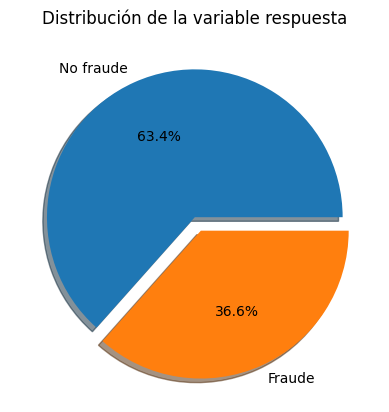

,count
respuesta,
0,1336
1,967


In [ ]:
data = pd.read_csv('datos.csv',skiprows=1)
n_filas  = data.shape[0]
n_columnas = data.shape[1]
print('Número de filas:',n_filas)
print('Número de columnas:',n_columnas)

#Añadimos variable respuesta
respuesta = [i>=1 for i in data['Numero Mop 97']]
data['respuesta'] = [int(i) for i in respuesta]

#Grafica de pastel de la variable respuesta
explode = [0,0.1]
plt.pie(data['respuesta'].value_counts(),
        labels=['No fraude','Fraude'],autopct='%1.1f%%',
        shadow=True,explode=explode)
plt.title('Distribución de la variable respuesta')
plt.show()

#Mostramos data de alerta defuncion positiva
data[data['Existencia Declaraciones Consumidor']==1]['respuesta'].value_counts()
#
#data.head()

In [ ]:
#Volvemos todos los booleanos a ceros y unos
for col in data.columns:
    #Vemos que tipo de dato es cada columna
    if data[col].dtype == 'bool':
        print(col)
        data[col] = data[col].astype(int)
        print('-'*100)

#Eliminamos variable tipo moneda:
data = data.drop(columns=['Tipo Moneda'])

data.head()

Nueva Direccion Reportada Ultimos 60 Dias
----------------------------------------------------------------------------------------------------
Alerta Aparece Fecha Defuncion
----------------------------------------------------------------------------------------------------
Alerta Rfc Cliente No Corresponde
----------------------------------------------------------------------------------------------------
Alerta Direccion No Corresponde
----------------------------------------------------------------------------------------------------
Alerta Uso Futuro
----------------------------------------------------------------------------------------------------
Alerta Direccion Invalida
----------------------------------------------------------------------------------------------------
Existencia Declaraciones Consumidor
----------------------------------------------------------------------------------------------------


,Created On,Last Updated On,Fecha Ingreso Bd,Numero Mop7,Numero Mop6,Numero Mop5,Numero Mop4,Numero Mop3,Numero Mop2,Numero Mop1,...,Numero Mop 99,Fecha Apertura Cuenta Mas Antigua,Fecha Apertura Cuenta Mas Reciente,Total Solicitudes Reporte,Fecha Solicitud Reporte Mas Reciente,Numero Total Cuentas Despacho Cobranza,Fecha Apertura Cuenta Mas Reciente Despacho Cobranza,Numero Total Solicitudes Despacho Cobranza,Fecha Solicitud Mas Reciente Despacho Cobranza,respuesta
0,"November 4, 2024, 1:34 AM","November 4, 2024, 1:34 AM","September 27, 2002",0,0,0,0,0,0,0,...,0,NaN,NaN,4,"October 30, 2024",0,NaN,0,NaN,0
1,"November 4, 2024, 6:53 PM","November 4, 2024, 6:53 PM","December 30, 2015",0,0,0,0,0,0,0,...,0,NaN,NaN,10,"July 25, 2024",0,NaN,0,NaN,0
2,"November 4, 2024, 6:55 PM","November 4, 2024, 6:55 PM","January 23, 2017",0,0,0,0,0,0,0,...,0,NaN,NaN,3,"September 16, 2024",0,NaN,0,NaN,0
3,"November 5, 2024, 2:14 PM","November 5, 2024, 2:14 PM","November 5, 2024",0,0,0,0,0,0,0,...,0,NaN,NaN,0,NaN,0,NaN,0,NaN,0
4,"November 6, 2024, 3:00 AM","November 6, 2024, 3:00 AM","November 6, 2024",0,0,0,0,0,0,0,...,0,NaN,NaN,0,NaN,0,NaN,0,NaN,0


In [ ]:
#Buscamos variables redundantes (Que solo tengan un tipo de registro)
print('Variables redundantes:\n')
for col in data.columns:
    if data[col].nunique() == 1:
        print(col)
    #A la vez vemos si tienen valores nulos
        if data[col].isnull().any():
            print('tiene valores nulos')
        print('-'*50)

#Eliminamos la variable 'Numero Total Solicitudes Despacho Cobranza' por ser redundante.
data = data.drop(columns = ['Numero Total Solicitudes Despacho Cobranza'])

#Volvemos la variable 'Tipo Moneda' a unos y ceros
#dicc_moneda = {'MX':1}
#data['Tipo Moneda'] = data['Tipo Moneda'].map(dicc_moneda).fillna(0)
data.columns


Variables redundantes:

Numero Total Solicitudes Despacho Cobranza
--------------------------------------------------


Index(['Created On', 'Last Updated On', 'Fecha Ingreso Bd', 'Numero Mop7',
       'Numero Mop6', 'Numero Mop5', 'Numero Mop4', 'Numero Mop3',
       'Numero Mop2', 'Numero Mop1', 'Numero Mop0', 'Numero Mopur',
       'Numero Cuentas', 'Cuentas Pagos Fijos Hipotecas',
       'Cuentas Revolventes Abiertas', 'Cuentas Cerradas',
       'Cuentas Negativas Actuales', 'Cuentas Claves Historia Negativa',
       'Cuentas Disputa', 'Numero Solicitudes Ultimos 6 Meses',
       'Nueva Direccion Reportada Ultimos 60 Dias',
       'Alerta Aparece Fecha Defuncion', 'Alerta Rfc Cliente No Corresponde',
       'Alerta Direccion No Corresponde', 'Alerta Uso Futuro',
       'Alerta Direccion Invalida', 'Existencia Declaraciones Consumidor',
       'Total Creditos Maximos Revolventes',
       'Total Limites Credito Revolventes',
       'Total Saldos Actuales Revolventes',
       'Total Saldos Vencidos Revolventes', 'Total Pagos Revolventes',
       'Pct Limite Credito Utilizado Revolventes',
       'Total

In [ ]:
#Vemos el número de nulos de cada variable
for col in data.columns:
    if data[col].isnull().any():
        print(
            'Nulos en\n' + str(col) + ':',end=''
            )
        print(
            col,data[col].isnull().sum()
            )
        #Imprimimos el porcentaje de nulos
        porcentaje = data[col].isnull().sum()/n_filas

        #Redondeamos para imprimir
        porcentaje = round(
            porcentaje,
            4)
        porcentaje *=100
        print(
            'Porcentaje de nulos ' + str(col) + ':',end=''
            )
        print(
            str(porcentaje) + '%'
            )

        #Ahora vemos la proporcion de unos y ceros en la variable respuesta
        # en los registros con saldo nulo
        print(
            data.loc[data[col].isnull()]['respuesta'].value_counts()
            )
        print('-'*100 )


#Repetimos el mismo bucle, pero eliminamos los registros con una variable nula
# cuando el porcentaje de nulos de dicha variable sea menor al 10%
for col in data.columns:
    if data[col].isnull().any():
      #Calculamos el porcentaje de nulos
        porcentaje = data[col].isnull().sum()/n_filas
        #Si el porcentaje es menor al 10% eliminamos registros
        if porcentaje < 0.1:
            data = data.dropna(subset=[col])

#Ver cuantos registros se perdieron
print('Registros eliminados:',n_filas - data.shape[0])
#Vemos el porcentaje de registros que se perdieron
print('Porcentaje de registros eliminados:',(n_filas - data.shape[0])/n_filas)
########################################################################
############         Auxiliar ##########################################
########################################################################
# Borramos las filas de registros con saldo nulo en las variables con un porcentaje
# de nulos menos al 10%
data.columns


Nulos en
Total Creditos Maximos Revolventes:Total Creditos Maximos Revolventes 462
Porcentaje de nulos Total Creditos Maximos Revolventes:8.59%
respuesta
0    462
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Nulos en
Total Limites Credito Revolventes:Total Limites Credito Revolventes 462
Porcentaje de nulos Total Limites Credito Revolventes:8.59%
respuesta
0    462
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Nulos en
Total Saldos Actuales Revolventes:Total Saldos Actuales Revolventes 462
Porcentaje de nulos Total Saldos Actuales Revolventes:8.59%
respuesta
0    462
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Nulos en
Total Saldos Vencidos Revolventes:Total Saldos Vencidos Revolventes 462
Porcentaje de nulos Total Saldos Vencidos Revolventes:8

Index(['Created On', 'Last Updated On', 'Fecha Ingreso Bd', 'Numero Mop7',
       'Numero Mop6', 'Numero Mop5', 'Numero Mop4', 'Numero Mop3',
       'Numero Mop2', 'Numero Mop1', 'Numero Mop0', 'Numero Mopur',
       'Numero Cuentas', 'Cuentas Pagos Fijos Hipotecas',
       'Cuentas Revolventes Abiertas', 'Cuentas Cerradas',
       'Cuentas Negativas Actuales', 'Cuentas Claves Historia Negativa',
       'Cuentas Disputa', 'Numero Solicitudes Ultimos 6 Meses',
       'Nueva Direccion Reportada Ultimos 60 Dias',
       'Alerta Aparece Fecha Defuncion', 'Alerta Rfc Cliente No Corresponde',
       'Alerta Direccion No Corresponde', 'Alerta Uso Futuro',
       'Alerta Direccion Invalida', 'Existencia Declaraciones Consumidor',
       'Total Creditos Maximos Revolventes',
       'Total Limites Credito Revolventes',
       'Total Saldos Actuales Revolventes',
       'Total Saldos Vencidos Revolventes', 'Total Pagos Revolventes',
       'Pct Limite Credito Utilizado Revolventes',
       'Total

In [ ]:
data.head()

,Created On,Last Updated On,Fecha Ingreso Bd,Numero Mop7,Numero Mop6,Numero Mop5,Numero Mop4,Numero Mop3,Numero Mop2,Numero Mop1,...,Numero Mop 97,Numero Mop 99,Fecha Apertura Cuenta Mas Antigua,Fecha Apertura Cuenta Mas Reciente,Total Solicitudes Reporte,Fecha Solicitud Reporte Mas Reciente,Numero Total Cuentas Despacho Cobranza,Fecha Apertura Cuenta Mas Reciente Despacho Cobranza,Fecha Solicitud Mas Reciente Despacho Cobranza,respuesta
8,"November 1, 2024, 12:18 AM","November 1, 2024, 12:18 AM","December 22, 2009",1,1,0,0,0,0,13,...,0,0,"May 5, 2016","August 15, 2024",26,"October 29, 2024",0,NaN,NaN,0
10,"November 1, 2024, 12:22 AM","November 1, 2024, 12:22 AM","October 25, 2021",0,1,0,0,0,0,0,...,1,0,"October 23, 2023","December 19, 2023",57,"October 30, 2024",0,NaN,NaN,1
11,"November 1, 2024, 12:26 AM","November 1, 2024, 12:26 AM","May 21, 2022",0,0,0,0,0,0,0,...,1,0,"August 2, 2022","August 11, 2022",7,"October 16, 2024",0,NaN,NaN,1
12,"November 1, 2024, 12:30 AM","November 1, 2024, 12:30 AM","June 14, 2021",0,0,0,0,0,0,1,...,1,0,"May 27, 2021","October 17, 2021",15,"October 6, 2024",0,NaN,NaN,1
13,"November 1, 2024, 12:32 AM","November 1, 2024, 12:32 AM","July 8, 2010",0,0,0,0,0,0,8,...,0,0,"December 20, 2014","October 23, 2023",10,"October 31, 2024",0,NaN,NaN,0


In [ ]:
#Eliminamos la variable 'Fecha Solicitud Mas reciente Despacho Cobranza' pues solo contiene nulos
data = data.drop(columns=['Fecha Solicitud Mas Reciente Despacho Cobranza'])


# Borrado auxiliar pues no se si quieran darle tratamiento a estas variables

In [ ]:
#Eliminamos las primeras tres columnas pues contienen datos de fecha
data = data.drop(columns=data.columns[:3])

In [ ]:
print(data.columns)

Index(['Numero Mop7', 'Numero Mop6', 'Numero Mop5', 'Numero Mop4',
       'Numero Mop3', 'Numero Mop2', 'Numero Mop1', 'Numero Mop0',
       'Numero Mopur', 'Numero Cuentas', 'Cuentas Pagos Fijos Hipotecas',
       'Cuentas Revolventes Abiertas', 'Cuentas Cerradas',
       'Cuentas Negativas Actuales', 'Cuentas Claves Historia Negativa',
       'Cuentas Disputa', 'Numero Solicitudes Ultimos 6 Meses',
       'Nueva Direccion Reportada Ultimos 60 Dias',
       'Alerta Aparece Fecha Defuncion', 'Alerta Rfc Cliente No Corresponde',
       'Alerta Direccion No Corresponde', 'Alerta Uso Futuro',
       'Alerta Direccion Invalida', 'Existencia Declaraciones Consumidor',
       'Total Creditos Maximos Revolventes',
       'Total Limites Credito Revolventes',
       'Total Saldos Actuales Revolventes',
       'Total Saldos Vencidos Revolventes', 'Total Pagos Revolventes',
       'Pct Limite Credito Utilizado Revolventes',
       'Total Creditos Maximos Pagos Fijos',
       'Total Saldos Actuale

In [ ]:
# Tambien eliminamos las columnas cuyo nombre contenga el texto 'Fecha'
for col in data.columns:
    if 'Fecha' in col:
        data = data.drop(columns=[col])

In [ ]:
data.head()

,Numero Mop7,Numero Mop6,Numero Mop5,Numero Mop4,Numero Mop3,Numero Mop2,Numero Mop1,Numero Mop0,Numero Mopur,Numero Cuentas,...,Total Creditos Maximos Pagos Fijos,Total Saldos Actuales Pagos Fijos,Total Saldos Vencidos Pagos Fijos,Total Pagos Pagos Fijos,Numero Mop 96,Numero Mop 97,Numero Mop 99,Total Solicitudes Reporte,Numero Total Cuentas Despacho Cobranza,respuesta
8,1,1,0,0,0,0,13,1,0,18,...,"1,239,594","1,214,971","10,058","20,866",2,0,0,26,0,0
10,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,57,0,1
11,0,0,0,0,0,0,0,0,0,2,...,"11,583","9,801","9,801",297,1,1,0,7,0,1
12,0,0,0,0,0,0,1,0,0,4,...,983,"1,847","1,847",551,2,1,0,15,0,1
13,0,0,0,0,0,0,8,0,0,8,...,"329,288","306,585",0,"5,078",0,0,0,10,0,0


In [ ]:
#Analizamos las variables de tipo object

#Eliminamos las comas de estas variables que son de tipo texto
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.replace(',','')

#Ahora volvemos estas variables a numericas
for col in data.select_dtypes(include='object').columns:
    data[col] = pd.to_numeric(data[col])


In [ ]:
data.head()

,Numero Mop7,Numero Mop6,Numero Mop5,Numero Mop4,Numero Mop3,Numero Mop2,Numero Mop1,Numero Mop0,Numero Mopur,Numero Cuentas,...,Total Creditos Maximos Pagos Fijos,Total Saldos Actuales Pagos Fijos,Total Saldos Vencidos Pagos Fijos,Total Pagos Pagos Fijos,Numero Mop 96,Numero Mop 97,Numero Mop 99,Total Solicitudes Reporte,Numero Total Cuentas Despacho Cobranza,respuesta
8,1,1,0,0,0,0,13,1,0,18,...,1239594,1214971,10058,20866,2,0,0,26,0,0
10,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,57,0,1
11,0,0,0,0,0,0,0,0,0,2,...,11583,9801,9801,297,1,1,0,7,0,1
12,0,0,0,0,0,0,1,0,0,4,...,983,1847,1847,551,2,1,0,15,0,1
13,0,0,0,0,0,0,8,0,0,8,...,329288,306585,0,5078,0,0,0,10,0,0


In [ ]:
data.dtypes

,0
Numero Mop7,int64
Numero Mop6,int64
Numero Mop5,int64
Numero Mop4,int64
Numero Mop3,int64
Numero Mop2,int64
Numero Mop1,int64
Numero Mop0,int64
Numero Mopur,int64
Numero Cuentas,int64


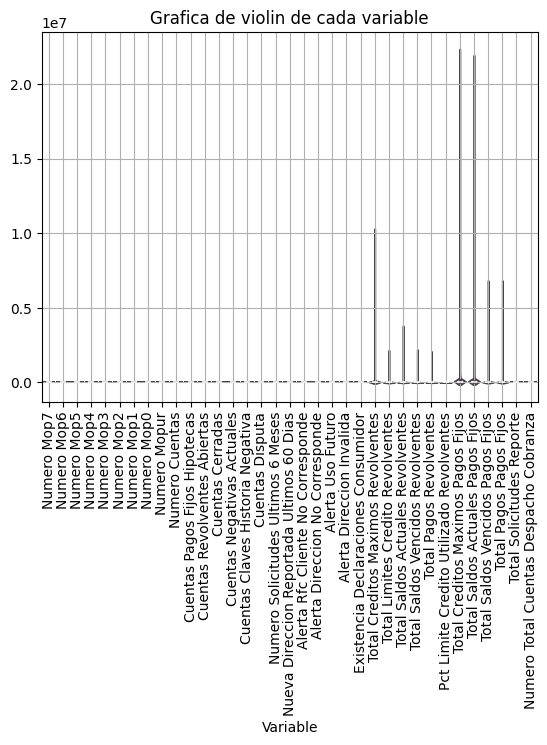

Resumen data cruda
       Numero Mop7  Numero Mop6  Numero Mop5  Numero Mop4  Numero Mop3  \
count  4843.000000  4843.000000  4843.000000  4843.000000  4843.000000   
mean      0.433822     0.095602     0.093950     0.091059     0.072476   
std       1.386304     0.468490     0.393108     0.373879     0.343573   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max      26.000000    15.000000     7.000000     7.000000     9.000000   

       Numero Mop2  Numero Mop1  Numero Mop0  Numero Mopur  Numero Cuentas  \
count  4843.000000  4843.000000  4843.000000   4843.000000     4843.000000   
mean      0.092711     6.010737     0.054925      0.197811        8.960975   
std       0.416356     8.662942     0.240211      0.547326       10.300079   
mi

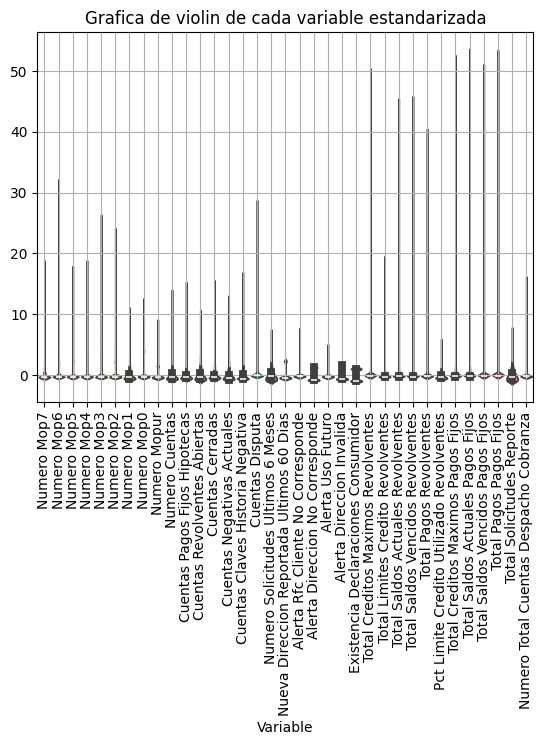

Resumen data estandarizada
        Numero Mop7   Numero Mop6   Numero Mop5   Numero Mop4   Numero Mop3  \
count  4.843000e+03  4.843000e+03  4.843000e+03  4.843000e+03  4.843000e+03   
mean   4.254747e-17 -2.054016e-17  1.650548e-17  1.027008e-17  2.164052e-17   
std    1.000103e+00  1.000103e+00  1.000103e+00  1.000103e+00  1.000103e+00   
min   -3.129666e-01 -2.040850e-01 -2.390177e-01 -2.435776e-01 -2.109690e-01   
25%   -3.129666e-01 -2.040850e-01 -2.390177e-01 -2.435776e-01 -2.109690e-01   
50%   -3.129666e-01 -2.040850e-01 -2.390177e-01 -2.435776e-01 -2.109690e-01   
75%   -3.129666e-01 -2.040850e-01 -2.390177e-01 -2.435776e-01 -2.109690e-01   
max    1.844388e+01  3.181698e+01  1.756964e+01  1.848097e+01  2.598705e+01   

        Numero Mop2   Numero Mop1   Numero Mop0  Numero Mopur  Numero Cuentas  \
count  4.843000e+03  4.843000e+03  4.843000e+03  4.843000e+03    4.843000e+03   
mean   2.897629e-17 -2.274089e-17 -1.467154e-18 -2.347447e-17   -9.903290e-18   
std    1.000103e+0

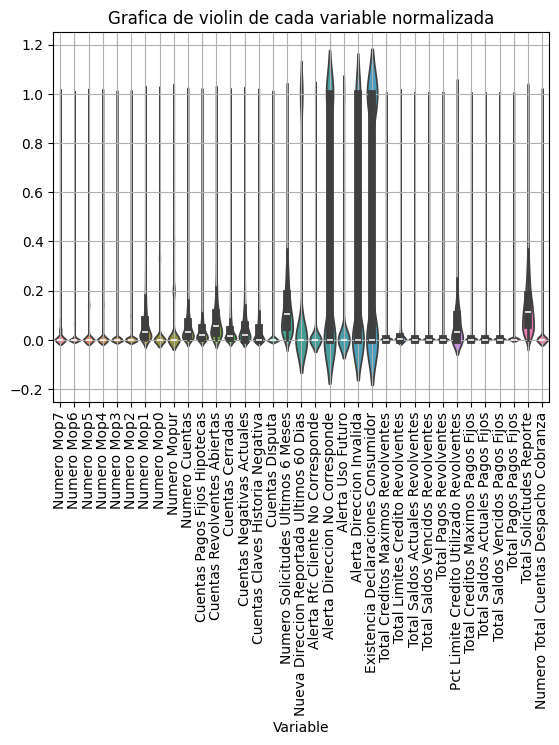

Resumen data normalizada
       Numero Mop7  Numero Mop6  Numero Mop5  Numero Mop4  Numero Mop3  \
count  4843.000000  4843.000000  4843.000000  4843.000000  4843.000000   
mean      0.016685     0.006373     0.013421     0.013008     0.008053   
std       0.053319     0.031233     0.056158     0.053411     0.038175   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       Numero Mop2  Numero Mop1  Numero Mop0  Numero Mopur  Numero Cuentas  \
count  4843.000000  4843.000000  4843.000000   4843.000000     4843.000000   
mean      0.009271     0.060715     0.018308      0.039562        0.053429   
std       0.041636     0.087504     0.080070      0.109465        0.069128

In [ ]:
#Separamos las variables 'Numero Mop 96, 97 y 99 del data
y = data['respuesta']
X = data.drop(columns=['respuesta','Numero Mop 96','Numero Mop 97','Numero Mop 99'])
sns.violinplot(X)
plt.title('Grafica de violin de cada variable')
plt.xlabel('Variable')
plt.grid(True)
#Rotamos xticks
plt.xticks(rotation=90)
plt.show()
print('Resumen data cruda')
print(X.describe())


#Estandarizamos la data
X_estandarizada = StandardScaler().fit_transform(X)
#Renombramos variables
X_estandarizada = pd.DataFrame(X_estandarizada,columns=X.columns)
sns.violinplot(X_estandarizada)
plt.title('Grafica de violin de cada variable estandarizada')
plt.xlabel('Variable')
plt.grid(True)
#Rotamos xticks
plt.xticks(rotation=90)
plt.show()
print('Resumen data estandarizada')
print(pd.DataFrame(X_estandarizada,columns=X.columns).describe())

#Normalizamos la data
X_normalizada = MinMaxScaler().fit_transform(X)
#Renombramos variables
X_normalizada = pd.DataFrame(X_normalizada,columns=X.columns)
sns.violinplot(X_normalizada)
plt.title('Grafica de violin de cada variable normalizada')
plt.xlabel('Variable')
plt.grid(True)
#Rotamos xticks
plt.xticks(rotation=90)
plt.show()
print('Resumen data normalizada')
print(pd.DataFrame(X_normalizada,columns=X.columns).describe())

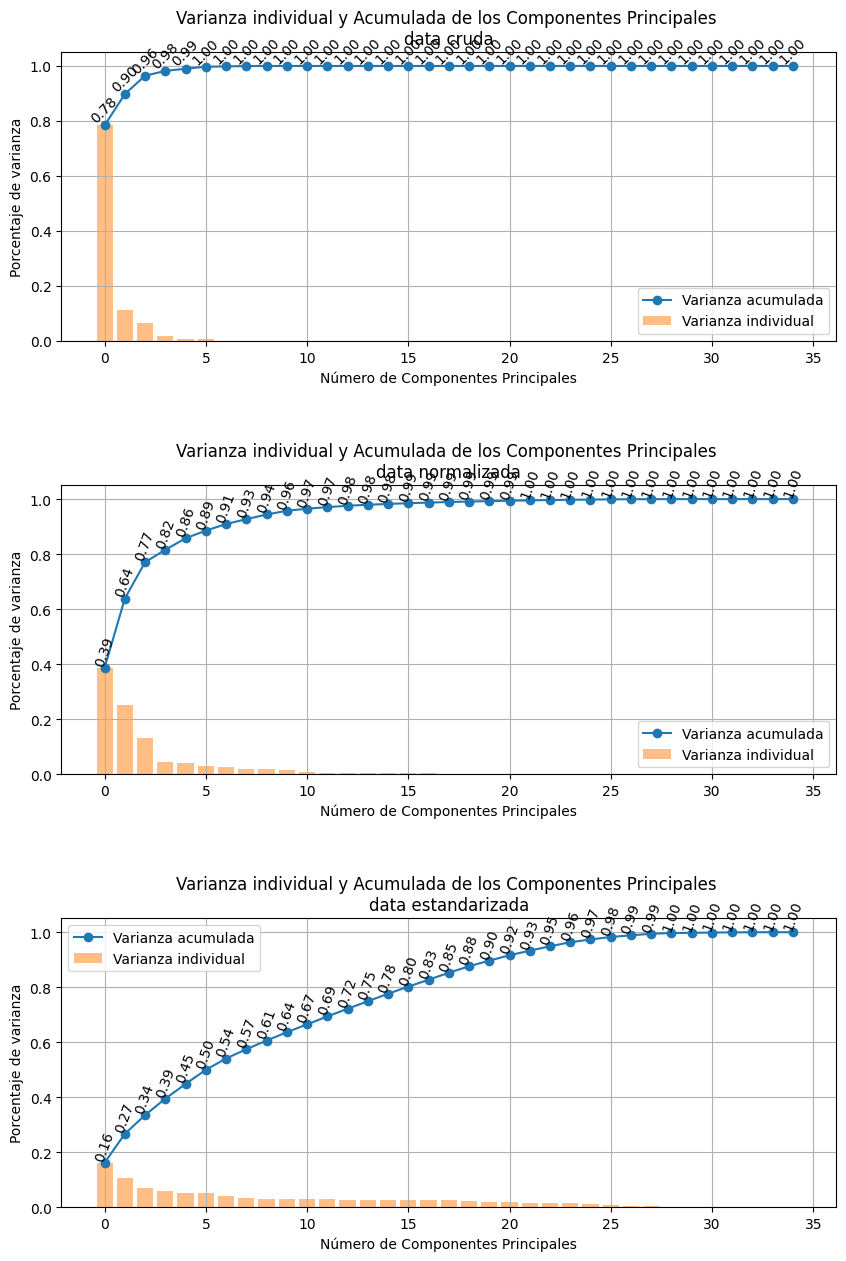

In [ ]:
# Realizamos PCA

#n_components = 2  # Número de componentes principales a mantener
n_components = X.shape[1]
pca = PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

#Repetimos analisis pero con data normalizada
#n_components = X_normalizada.shape[1]
pca_normalizada = PCA(n_components=n_components)
pca_normalizada.fit(X_normalizada)
X_pca_normalizada = pca_normalizada.transform(X_normalizada)

#Repetimos analisis pero con data estandarizada
#n_components = X_estandarizada.shape[1]
pca_estandarizada = PCA(n_components=n_components)
pca_estandarizada.fit(X_estandarizada)
X_pca_estandarizada = pca_estandarizada.transform(X_estandarizada)

#Renombramos columnas de cada matriz de componentes
cols_pca = [f'PC{i+1}' for i in range(n_components)]
cols_pca_normalizada = [f'PC{i+1}_normalizada' for i in range(n_components)]
cols_pca_estandarizada = [f'PC{i+1}_estandarizada' for i in range(n_components)]
X_pca = pd.DataFrame(X_pca, columns=cols_pca)
X_pca_normalizada =   pd.DataFrame(X_pca_normalizada, columns=cols_pca_normalizada)
X_pca_estandarizada = pd.DataFrame(X_pca_estandarizada, columns=cols_pca_estandarizada)

#Graficamos la varianza de los componentes principales de la data no estandarizada
fig,ax = plt.subplots(3,1,figsize=(10, 15))
#Varianza acumulada
ax[0].plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-',
         label='Varianza acumulada')
#Graficamos el texto de la varianza acumulada
ax[0].bar(range(n_components), pca.explained_variance_ratio_, alpha=0.5,
        label='Varianza individual',color='tab:orange')
for i,txt in enumerate(np.cumsum(pca.explained_variance_ratio_)):
    ax[0].text(i,txt,f'{txt:.2f}',ha='center',va='bottom',rotation=45)
#Titulo
ax[0].set_title('Varianza individual y Acumulada de los Componentes Principales \ndata cruda')
#Etiqueta eje x
ax[0].set_xlabel('Número de Componentes Principales')
#Etiqueta eje y
ax[0].set_ylabel('Porcentaje de varianza')
#Leyenda
ax[0].legend()
ax[0].grid(True)

#Repetimos analisis pero con data normalizada
ax[1].plot(np.cumsum(pca_normalizada.explained_variance_ratio_), marker='o', linestyle='-',
         label='Varianza acumulada')
ax[1].bar(range(n_components),pca_normalizada.explained_variance_ratio_,alpha=0.5,
          label='Varianza individual',color='tab:orange')
for i,txt in enumerate(np.cumsum(pca_normalizada.explained_variance_ratio_)):
    ax[1].text(i,txt,f'{txt:.2f}',ha='center',va='bottom',rotation=70)
#Titulo
ax[1].set_title('Varianza individual y Acumulada de los Componentes Principales \ndata normalizada')
#Etiqueta eje x
ax[1].set_xlabel('Número de Componentes Principales')
#Etiqueta eje y
ax[1].set_ylabel('Porcentaje de varianza')
#Leyenda
ax[1].legend()
ax[1].grid(True)

#Repetimos analisis pero con data estandarizada
ax[2].plot(np.cumsum(pca_estandarizada.explained_variance_ratio_), marker='o', linestyle='-',
         label='Varianza acumulada')
ax[2].bar(range(n_components),pca_estandarizada.explained_variance_ratio_,alpha=0.5,
          label='Varianza individual',color='tab:orange')
for i,txt in enumerate(np.cumsum(pca_estandarizada.explained_variance_ratio_)):
    ax[2].text(i,txt,f'{txt:.2f}',ha='center',va='bottom',rotation=70)
ax[2].set_title('Varianza individual y Acumulada de los Componentes Principales \ndata estandarizada')
ax[2].set_xlabel('Número de Componentes Principales')
ax[2].set_ylabel('Porcentaje de varianza')
ax[2].legend()
ax[2].grid(True)

#Agrandamos espacio entre graficas
plt.subplots_adjust(hspace=0.5)
plt.show()


<ipython-input-17-0f67b21238f8>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-17-0f67b21238f8>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
<ipython-input-17-0f67b21238f8>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)


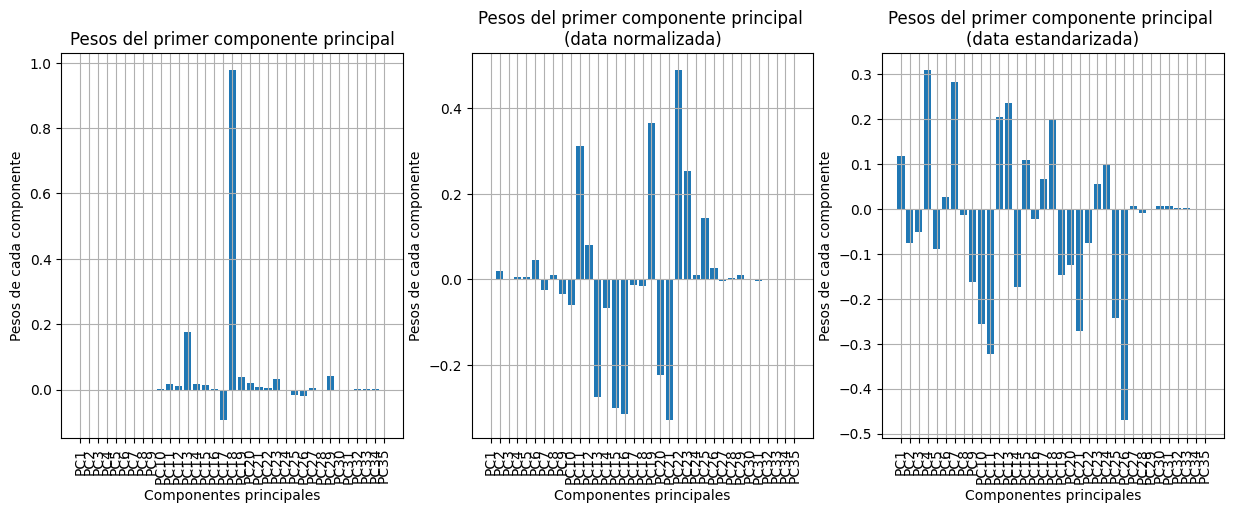

,PC1,PC1_normalizada,PC1_estandarizada,PC2,PC2_normalizada,PC2_estandarizada,PC3,PC3_normalizada,PC3_estandarizada,PC4,...,PC32_estandarizada,PC33,PC33_normalizada,PC33_estandarizada,PC34,PC34_normalizada,PC34_estandarizada,PC35,PC35_normalizada,PC35_estandarizada
Numero Mop7,-0.000000,-0.001737,0.118436,0.000000,0.000399,0.123692,0.000000,0.000787,0.126929,0.000000,...,0.082937,0.079680,-0.000474,0.073476,0.000001,-0.003496,0.193290,0.000000,0.001088,0.085056
Numero Mop6,-0.000000,0.020467,-0.076123,0.000000,0.006112,-0.072155,0.000000,0.014181,-0.072609,0.000000,...,0.155312,-0.019543,0.000670,0.159752,0.000004,0.090840,-0.079936,0.000000,0.011691,0.120860
Numero Mop5,0.000000,-0.001307,-0.050183,0.000000,-0.000789,-0.031488,0.000000,-0.000100,-0.050254,0.000000,...,0.450542,0.679721,-0.001139,0.464396,-0.000001,0.026822,-0.098735,0.000000,-0.005314,-0.034814
Numero Mop4,-0.000000,0.006486,0.309025,0.000000,0.005693,0.101075,-0.000000,0.010889,0.192341,0.000000,...,0.234877,0.019649,0.004335,0.210558,-0.000005,0.081866,0.219938,0.000000,0.006220,0.178114
Numero Mop3,0.000001,0.006081,-0.089893,0.000000,0.011502,-0.084735,0.000000,0.014547,-0.009506,0.000000,...,-0.121698,-0.127464,0.009100,-0.095041,0.000003,0.028994,0.422075,0.000001,0.006947,-0.199211
Numero Mop2,0.000002,0.045866,0.027717,0.000000,0.026318,0.015044,0.000000,0.058005,0.059083,0.000000,...,0.011062,-0.045562,0.000170,0.013517,0.000008,0.253439,0.147505,0.000002,0.019417,-0.007527
Numero Mop1,0.000000,-0.025456,0.282228,0.000000,-0.025030,0.227366,0.000000,-0.057734,0.228280,0.000000,...,-0.253110,0.061217,0.000887,-0.242598,0.000026,-0.377124,-0.102657,-0.000001,-0.002906,-0.223508
Numero Mop0,-0.000004,0.010664,-0.013631,-0.000001,0.014989,0.008574,-0.000000,0.006711,-0.126889,-0.000000,...,0.065263,0.712661,0.000938,0.049840,-0.000021,-0.204232,-0.060656,-0.000002,0.016486,0.385805
Numero Mopur,0.000000,-0.033839,-0.163002,0.000000,-0.022236,0.256529,-0.000001,-0.014254,0.235447,-0.000000,...,0.303789,0.030109,-0.004925,0.323017,0.000026,0.395796,0.041389,0.000001,-0.044769,-0.313405
Numero Cuentas,0.000419,-0.060348,-0.257084,0.000133,-0.022206,-0.320296,0.000113,-0.053964,0.001695,0.000133,...,0.020227,0.000027,-0.002777,0.020974,0.005315,-0.022034,0.014090,-0.000054,0.019741,0.037339


In [ ]:
# Mostramos matriz de transformación
n_componentes_interes = X.shape[1]
matriz_tranformacion = pd.DataFrame(pca.components_,index=X.columns,columns=cols_pca)
matriz_tranformacion_normalizada = pd.DataFrame(pca_normalizada.components_,index=X.columns,columns=cols_pca_normalizada)
matriz_tranformacion_estandarizada = pd.DataFrame(pca_estandarizada.components_,index=X.columns,columns=cols_pca_estandarizada)

#Concatenamos las primeras columnas de cada matriz
pesos_componentes = pd.concat([matriz_tranformacion.iloc[:,:n_componentes_interes],
           matriz_tranformacion_normalizada.iloc[:,:n_componentes_interes],
           matriz_tranformacion_estandarizada.iloc[:,:n_componentes_interes]],axis=1)

#Reordenamos por los nombres de las columnas
pesos_componentes = pesos_componentes.reindex(columns=cols_pca[:n_componentes_interes]+cols_pca_normalizada[:n_componentes_interes]+cols_pca_estandarizada[:n_componentes_interes])
pesos_componentes

#Mostramos graficas de barras con pesos de cada matriz
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].bar(matriz_tranformacion.columns,matriz_tranformacion.iloc[:,0])
ax[0].set_title('Pesos del primer componente principal')
ax[0].set_xlabel('Componentes principales')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_ylabel('Pesos de cada componente')
ax[0].grid(True)
ax[1].bar(matriz_tranformacion_normalizada.columns,matriz_tranformacion_normalizada.iloc[:,0])
ax[1].set_title('Pesos del primer componente principal \n(data normalizada)')
ax[1].set_xlabel('Componentes principales')
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_ylabel('Pesos de cada componente')
ax[1].grid(True)
ax[2].bar(matriz_tranformacion_estandarizada.columns,matriz_tranformacion_estandarizada.iloc[:,0])
ax[2].set_title('Pesos del primer componente principal \n(data estandarizada)')
ax[2].set_xlabel('Componentes principales')
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_ylabel('Pesos de cada componente')
ax[2].grid(True)
plt.show()

#Redondeamos a 6 decimales
cols = []
for i in range(n_componentes_interes):
    cols.append('PC'+str(i+1))
    cols.append('PC'+str(i+1)+'_normalizada')
    cols.append('PC'+str(i+1)+'_estandarizada')

pesos_componentes.round(6).loc[:,cols]


## Análisis Vertientes

Vemos que tomando en cuenta la base cruda,norm, y std tenemos que los conmponentes que toman en su totalidad (o casi para std) son  5, 10 y 20 respectivamente. Ahora, tomando en cuenta los pesos que cada variable representa en cada uno de los PCA's resultantes (ver archivo excel "Analisis") notmaos que:

*   Cruda: cuenta con gran cantidad de variables de peso absoluto menor a 0.01, e incluso quitando esas hay pocas varibles que tengan un peso significativo (mayor a 0.4), por lo que si esta haciendo una disparidad considerable entre las variables, esto se puede deber a la diferencia entre escalas.
*   Normalizada: La cantidad de variables con peso bajo es bastante menor, y el resto tienen una distribución de pesos "mejor" incluso teniendo algunas celdas más de pesos significativos.  
*   Estandarizda: Es parecido a la norm, con la ventaja de "eliminar" menos variables significativas. Curiosamente estas dos últimas transformaciones parecen invertir el peso de las variables con mayor escala respecto a las otras.

Consideración respecto a la forma de reescala: La norm por min-max es recomendable para procesos que involucran calculo de distancias, como k-means, mientras que la estandarización para aquellos que involucren supuestos de normalidad en los datos, como es el caso del análisis de discriminantes.

Conlusión: Si bien la base cruda optiene mejores indices como en la curva ROC, dado los rangos de algunos grupos de variables, asi como los pesos demostrados en todos los resultados, considero decanttarnos por un reescalado por estandarización. Este, a pesar de involucrar mayor numero de componentes para conservar una varianza alta obtiene los mejores resultados en algunos resultados finales como lo fue en la matriz de confusión


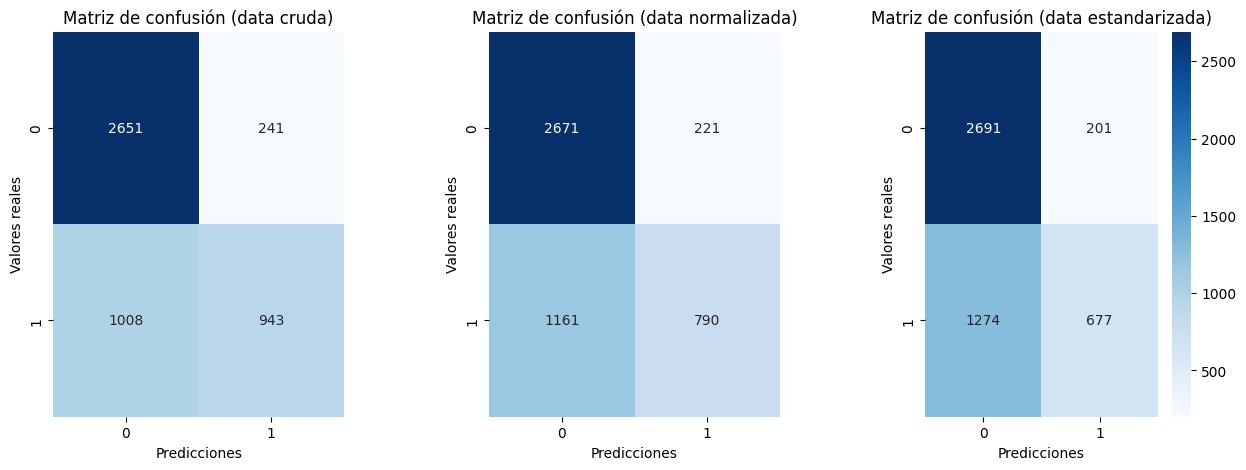

Precisión del modelo con data cruda: 0.7421020028907702
Precisión del modelo con data normalizada: 0.7146396861449514
Precisión del modelo con data estandarizada: 0.6954367127813339


In [ ]:
#n_components = X.shape[1]
n_components = 22
# Aplicamos analisis de discriminante con solo los primeros 3 componentes
lda = LinearDiscriminantAnalysis()
lda_normalizada = LinearDiscriminantAnalysis()
lda_estandarizada = LinearDiscriminantAnalysis()

#X_lda = lda.fit_transform(X.iloc[:,:3], y)

lda = lda.fit(X_pca.iloc[:,:n_components], y)
lda_normalizada = lda_normalizada.fit(X_pca_normalizada.iloc[:,:n_components], y)
lda_estandarizada = lda_estandarizada.fit(X_pca_estandarizada.iloc[:,:n_components], y)

#Hacemos predicción del lda
y_pred = lda.predict(X_pca.iloc[:,:n_components])
y_pred_normalizada = lda_normalizada.predict(X_pca_normalizada.iloc[:,:n_components])
y_pred_estandarizada = lda_estandarizada.predict(X_pca_estandarizada.iloc[:,:n_components])

#Calculamos matriz de confucion
matriz = confusion_matrix(y_true=y, y_pred=y_pred)
matriz_normalizada = confusion_matrix(y_true=y, y_pred=y_pred_normalizada)
matriz_estandarizada = confusion_matrix(y_true=y, y_pred=y_pred_estandarizada)

#Graficamos la matriz de confusión
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', ax=ax[0],cbar=False)
ax[0].set_title('Matriz de confusión (data cruda)')
ax[0].set_xlabel('Predicciones')
ax[0].set_ylabel('Valores reales')
ax[0].set_xlabel('Predicciones')
ax[0].set_ylabel('Valores reales')

sns.heatmap(matriz_normalizada, annot=True, fmt='d', cmap='Blues', ax=ax[1],cbar=False)
ax[1].set_title('Matriz de confusión (data normalizada)')
ax[1].set_xlabel('Predicciones')
ax[1].set_ylabel('Valores reales')
ax[1].set_xlabel('Predicciones')
ax[1].set_ylabel('Valores reales')

sns.heatmap(matriz_estandarizada, annot=True, fmt='d', cmap='Blues', ax=ax[2])
ax[2].set_title('Matriz de confusión (data estandarizada)')
ax[2].set_xlabel('Predicciones')
ax[2].set_ylabel('Valores reales')
ax[2].set_xlabel('Predicciones')
ax[2].set_ylabel('Valores reales')

plt.subplots_adjust(wspace=0.5)
plt.show()

#Mostramos la precisión del modelo
print('Precisión del modelo con data cruda:', lda.score(X_pca.iloc[:,:n_components], y))
print('Precisión del modelo con data normalizada:', lda_normalizada.score(X_pca_normalizada.iloc[:,:n_components], y))
print('Precisión del modelo con data estandarizada:', lda_estandarizada.score(X_pca_estandarizada.iloc[:,:n_components], y))

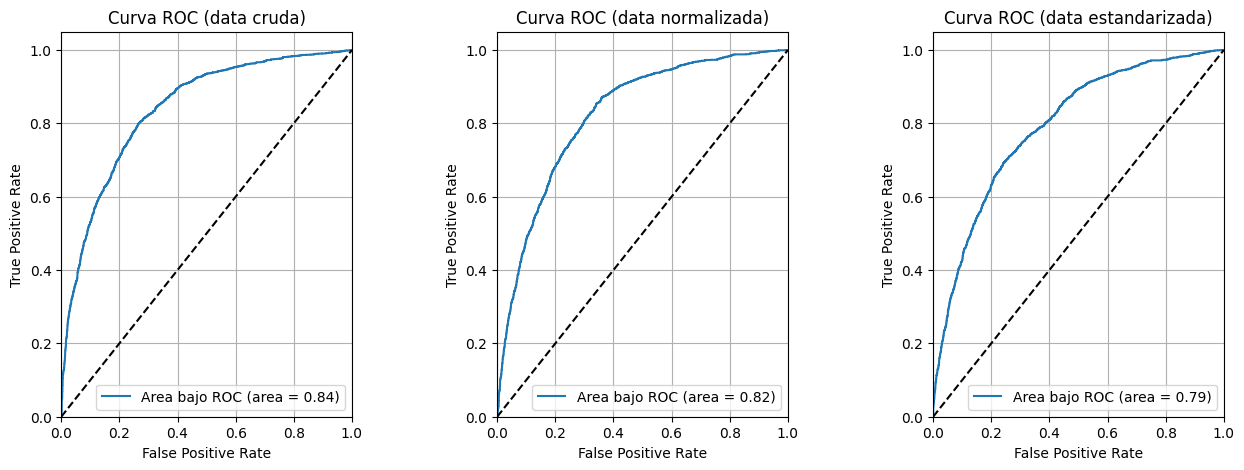

In [ ]:
#Grafica de curva roc

#n_components = X.shape[1]
n_components = 22

#Creamos los modelos de discriminatnes con el numero de columnas deseados
lda = LinearDiscriminantAnalysis()
lda_normalizada = LinearDiscriminantAnalysis()
lda_estandarizada = LinearDiscriminantAnalysis()

#Ajsutamos modelos
lda = lda.fit(X_pca.iloc[:,:n_components], y)
lda_normalizada = lda_normalizada.fit(X_pca_normalizada.iloc[:,:n_components], y)
lda_estandarizada = lda_estandarizada.fit(X_pca_estandarizada.iloc[:,:n_components], y)

#Hacemos predicciones
y_pred_proba = lda.predict_proba(X_pca.iloc[:,:n_components])[:, 1]  # Probabilidades para la clase positiva
y_pred_proba_normalizada = lda_normalizada.predict_proba(X_pca_normalizada.iloc[:,:n_components])[:, 1]  # Probabilidades para la clase positiva
y_pred_proba_estandarizada = lda_estandarizada.predict_proba(X_pca_estandarizada.iloc[:,:n_components])[:, 1]  # Probabilidades para la clase positiva

#Calculo de curvas características
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
fpr_normalizada, tpr_normalizada, thresholds_normalizada = roc_curve(y, y_pred_proba_normalizada)
fpr_estandarizada, tpr_estandarizada, thresholds_estandarizada = roc_curve(y, y_pred_proba_estandarizada)

auc = roc_auc_score(y, y_pred_proba)
auc_normalizada = roc_auc_score(y, y_pred_proba_normalizada)
auc_estandarizada = roc_auc_score(y, y_pred_proba_estandarizada)

#Graficas
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(fpr, tpr, label='Area bajo ROC (area = %0.2f)' % auc)
ax[0].grid(True)
ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Curva ROC (data cruda)')
ax[0].legend(loc="lower right")

ax[1].plot(fpr_normalizada, tpr_normalizada, label='Area bajo ROC (area = %0.2f)' % auc_normalizada)
ax[1].grid(True)
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].plot([0, 1], [0, 1], 'k--')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Curva ROC (data normalizada)')
ax[1].legend(loc="lower right")

ax[2].plot(fpr_estandarizada, tpr_estandarizada, label='Area bajo ROC (area = %0.2f)' % auc_estandarizada)
ax[2].grid(True)
ax[2].set_xlim([0.0, 1.0])
ax[2].set_ylim([0.0, 1.05])
ax[2].plot([0, 1], [0, 1], 'k--')
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].set_title('Curva ROC (data estandarizada)')
ax[2].legend(loc="lower right")


plt.subplots_adjust(wspace=0.5)
plt.show()


Dividimos la data en prueba y entrenamiento

Precision del modelo: 0.739938080495356
Precision del modelo normalizado: 0.7120743034055728
Precision del modelo estandarizado: 0.6873065015479877


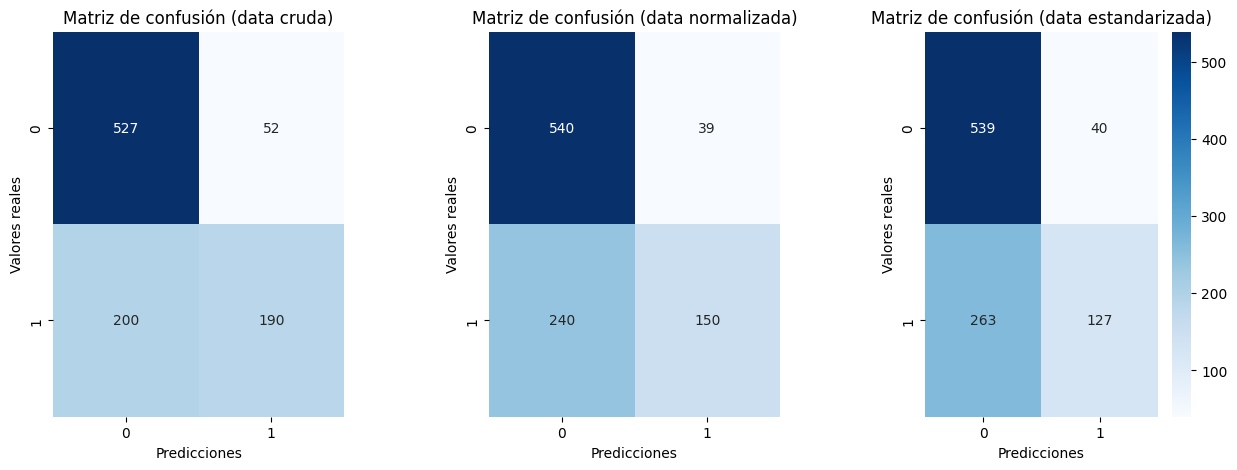

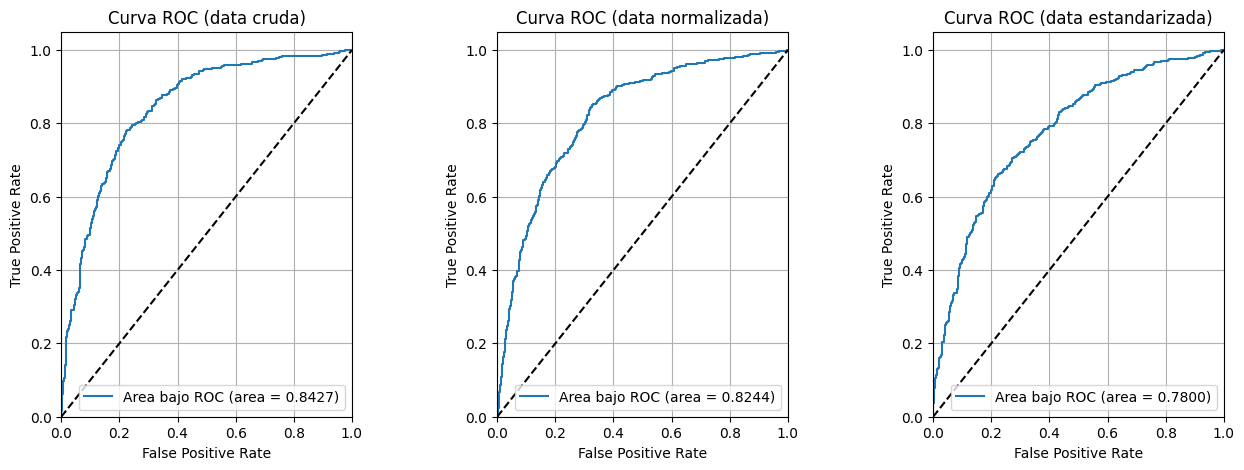

In [ ]:
n_components = X_pca.shape[1]
n_components = 22
#Repetimos analisis pero dividiendo en datos de prueba y entrenamiento
#Entrenamos con el 80% de los datos
X_train,X_test,y_train,y_test = train_test_split(X_pca.iloc[:,:n_components],y,
                                                 test_size=0.2,
                                                 random_state=42,stratify=y)

X_train_normalizada,X_test_normalizada,y_train_normalizada,y_test_normalizada = train_test_split(X_pca_normalizada.iloc[:,:n_components],
                                                                                                 y,test_size=0.2,
                                                                                                 random_state=42,stratify=y)

X_train_estandarizada,X_test_estandarizada,y_train_estandarizada,y_test_estandarizada = train_test_split(X_pca_estandarizada.iloc[:,:n_components],
                                                                                                 y,test_size=0.2,
                                                                                                 random_state=42,stratify=y)

#Ajustamos modelo
lda = lda.fit(X_train,y_train)
lda_normalizada = lda_normalizada.fit(X_train_normalizada,y_train_normalizada)
lda_estandarizada = lda_estandarizada.fit(X_train_estandarizada,y_train_estandarizada)

#Precicciones de cada modelo
y_pred = lda.predict(X_test)
y_pred_normalizada = lda_normalizada.predict(X_test_normalizada)
y_pred_estandarizada = lda_estandarizada.predict(X_test_estandarizada)

#Imprimimos precision del modelo
print('Precision del modelo:',lda.score(X_test,y_test))
print('Precision del modelo normalizado:',lda_normalizada.score(X_test_normalizada,y_test_normalizada))
print('Precision del modelo estandarizado:',lda_estandarizada.score(X_test_estandarizada,y_test_estandarizada))

#Matriz de confusión
matriz = confusion_matrix(y_true=y_test,y_pred=y_pred)
matriz_normalizada = confusion_matrix(y_true=y_test_normalizada,y_pred=y_pred_normalizada)
matriz_estandarizada = confusion_matrix(y_true=y_test_estandarizada,y_pred=y_pred_estandarizada)

#Mapas de calor
fig,ax = plt.subplots(1,3,figsize=(15,5))
sns.heatmap(matriz,annot=True,fmt='d',cmap='Blues',ax=ax[0],cbar=False)
ax[0].set_title('Matriz de confusión (data cruda)')
ax[0].set_xlabel('Predicciones')
ax[0].set_ylabel('Valores reales')

sns.heatmap(matriz_normalizada,annot=True,fmt='d',cmap='Blues',ax=ax[1],cbar=False)
ax[1].set_title('Matriz de confusión (data normalizada)')
ax[1].set_xlabel('Predicciones')
ax[1].set_ylabel('Valores reales')

sns.heatmap(matriz_estandarizada,annot=True,fmt='d',cmap='Blues',ax=ax[2])
ax[2].set_title('Matriz de confusión (data estandarizada)')
ax[2].set_xlabel('Predicciones')
ax[2].set_ylabel('Valores reales')

plt.subplots_adjust(wspace=0.5)
plt.show()


#Curva roc
y_pred_proba = lda.predict_proba(X_test)[:,1]
y_pred_proba_normalizada = lda_normalizada.predict_proba(X_test_normalizada)[:,1]
y_pred_proba_estandarizada = lda_estandarizada.predict_proba(X_test_estandarizada)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
fpr_normalizada,tpr_normalizada,thresholds_normalizada = roc_curve(y_test_normalizada,y_pred_proba_normalizada)
fpr_estandarizada,tpr_estandarizada,thresholds_estandarizada = roc_curve(y_test_estandarizada,y_pred_proba_estandarizada)

auc = roc_auc_score(y_test,y_pred_proba)
auc_normalizada = roc_auc_score(y_test_normalizada,y_pred_proba_normalizada)
auc_estandarizada = roc_auc_score(y_test_estandarizada,y_pred_proba_estandarizada)

fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(fpr,tpr,label='Area bajo ROC (area = %0.4f)' % auc)
ax[0].grid(True)
ax[0].plot([0,1],[0,1],'k--')
ax[0].set_xlim([0.0,1.0])
ax[0].set_ylim([0.0,1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].set_title('Curva ROC (data cruda)')
ax[0].legend(loc="lower right")

ax[1].plot(fpr_normalizada,tpr_normalizada,label='Area bajo ROC (area = %0.4f)' % auc_normalizada)
ax[1].grid(True)
ax[1].plot([0,1],[0,1],'k--')
ax[1].set_xlim([0.0,1.0])
ax[1].set_ylim([0.0,1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Curva ROC (data normalizada)')
ax[1].legend(loc="lower right")

ax[2].plot(fpr_estandarizada,tpr_estandarizada,label='Area bajo ROC (area = %0.4f)' % auc_estandarizada)
ax[2].grid(True)
ax[2].plot([0,1],[0,1],'k--')
ax[2].set_xlim([0.0,1.0])
ax[2].set_ylim([0.0,1.05])
ax[2].set_xlabel('False Positive Rate')
ax[2].set_ylabel('True Positive Rate')
ax[2].set_title('Curva ROC (data estandarizada)')
ax[2].legend(loc="lower right")

plt.subplots_adjust(wspace=0.5)
plt.show()

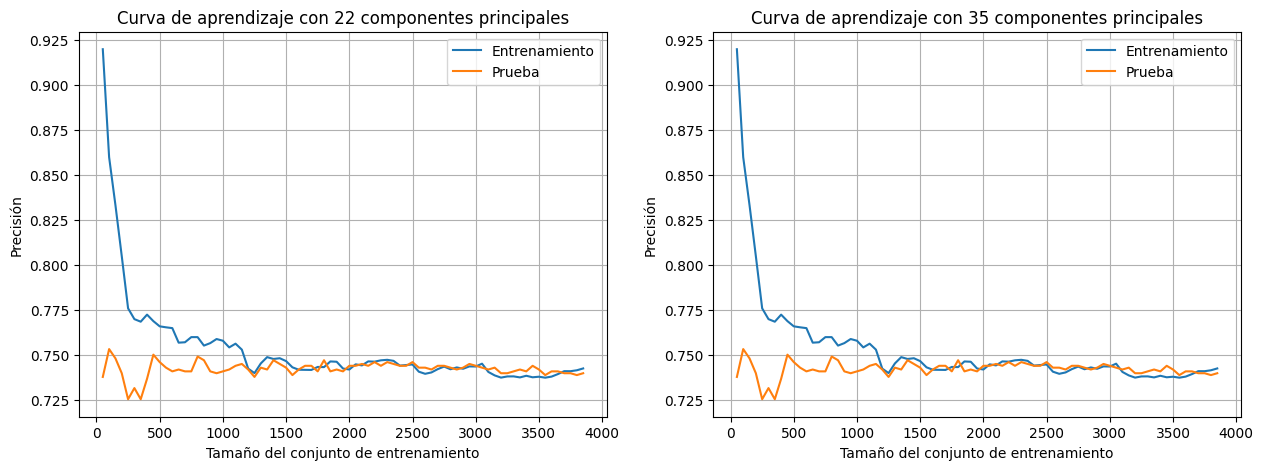

In [ ]:
#Mostramos curva de aprendizaje
#n_components = X_pca.shape[1]
n_components = 22
train_scores = []
test_scores = []
train_sizes = []
for train_size in range(50,X_train.shape[0],50):
    X_train_subset = X_train.iloc[:train_size,:]
    y_train_subset = y_train.iloc[:train_size]
    lda = lda.fit(X_train_subset,y_train_subset)
    train_scores.append(lda.score(X_train_subset,y_train_subset))
    test_scores.append(lda.score(X_test,y_test))
    train_sizes.append(train_size)

#Hacemos dos graficas
fig,ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(train_sizes,train_scores,label='Entrenamiento')
ax[0].plot(train_sizes,test_scores,label='Prueba')
ax[0].set_xlabel('Tamaño del conjunto de entrenamiento')
ax[0].set_ylabel('Precisión')
ax[0].set_title('Curva de aprendizaje con ' + str(n_components) + ' componentes principales')
ax[0].legend()
ax[0].grid(True)


#repetimos el analisis con todos los componentes
n_components = X_pca.shape[1]
train_scores = []
test_scores = []
train_sizes = []
for train_size in range(50,X_train.shape[0],50):
    X_train_subset = X_train.iloc[:train_size,:]
    y_train_subset = y_train.iloc[:train_size]
    lda = lda.fit(X_train_subset,y_train_subset)
    train_scores.append(lda.score(X_train_subset,y_train_subset))
    test_scores.append(lda.score(X_test,y_test))
    train_sizes.append(train_size)

#Segunda grafica
ax[1].plot(train_sizes,train_scores,label='Entrenamiento')
ax[1].plot(train_sizes,test_scores,label='Prueba')
ax[1].set_xlabel('Tamaño del conjunto de entrenamiento')
ax[1].set_ylabel('Precisión')
ax[1].set_title('Curva de aprendizaje con ' + str(n_components) + ' componentes principales')
ax[1].legend()
ax[1].grid(True)

plt.show()


# Segundo enfoque

In [ ]:
# Seleccionamos los pesos del primer componente del pca aplicado a la data estandarizada
n = 35
pesos_pca_estandarizada = matriz_tranformacion_estandarizada.iloc[:,0].values
data_componente = pd.DataFrame(pesos_pca_estandarizada,columns=['Pesos'],index=X.columns)
data_componente.head(n)

#Añadimos columna de valor absoluto
data_componente['Valor absoluto'] = abs(data_componente['Pesos'])

#Ordenamos por valor absoluto
data_componente = data_componente.sort_values(by='Valor absoluto',ascending=False)
data_componente.head(n)


,Pesos,Valor absoluto
Total Saldos Actuales Revolventes,-4.706004e-01,4.706004e-01
Cuentas Pagos Fijos Hipotecas,-3.217777e-01,3.217777e-01
Numero Mop4,3.090252e-01,3.090252e-01
Numero Mop1,2.822276e-01,2.822276e-01
Alerta Uso Futuro,-2.712959e-01,2.712959e-01
Numero Cuentas,-2.570837e-01,2.570837e-01
Total Limites Credito Revolventes,-2.435141e-01,2.435141e-01
Cuentas Cerradas,2.373832e-01,2.373832e-01
Cuentas Revolventes Abiertas,2.059362e-01,2.059362e-01
Nueva Direccion Reportada Ultimos 60 Dias,2.012380e-01,2.012380e-01


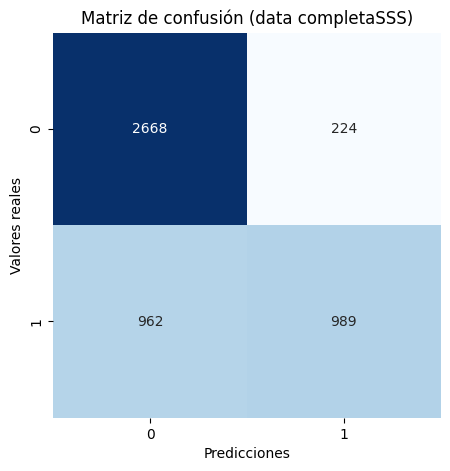

Precision del modelo: 0.7551104687177369
Tasa de falsos positivos: 0.2448895312822631
Tasa de falsos negativos: 0.7551104687177369


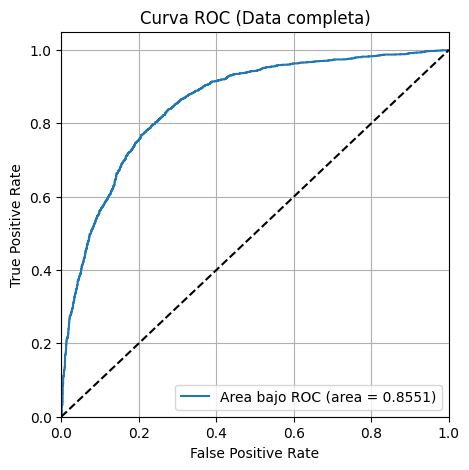

In [ ]:
#Repetimos analisis de discriminante solo con las primeras 10 variable
variables = data_componente.index[:n].values
X_pca_estandarizada_10 = data.drop(columns=['Numero Mop 96', 'Numero Mop 97', 'Numero Mop 99','respuesta'])
y_pca_estandarizada_10 = data.loc[:,'respuesta']

lda_filtrado = LinearDiscriminantAnalysis()
lda_filtrado = lda_filtrado.fit(X_pca_estandarizada_10,y_pca_estandarizada_10)

#Prediccion de modelo
y_pred_filtrado = lda_filtrado.predict(X_pca_estandarizada_10)

#Matriz de confusion
matriz_filtrada = confusion_matrix(y_true=y_pca_estandarizada_10,y_pred=y_pred_filtrado)

#Grafica de matriz de confusion
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.heatmap(matriz_filtrada,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False)
ax.set_title('Matriz de confusión (data completaSSS)')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Valores reales')
plt.show()

#Curva roc
y_pred_proba_filtrado = lda_filtrado.predict_proba(X_pca_estandarizada_10)[:,1]
fpr_filtrado,tpr_filtrado,thresholds_filtrado = roc_curve(y_pca_estandarizada_10,y_pred_proba_filtrado)
auc_filtrado = roc_auc_score(y_pca_estandarizada_10,y_pred_proba_filtrado)

#Precision del modelo
print('Precision del modelo:',lda_filtrado.score(X_pca_estandarizada_10,y_pca_estandarizada_10))
#Tasa de falsos positivos
print('Tasa de falsos positivos:',1-lda_filtrado.score(X_pca_estandarizada_10,y_pca_estandarizada_10))
#Tasa de falsos negativos
print('Tasa de falsos negativos:',lda_filtrado.score(X_pca_estandarizada_10,y_pca_estandarizada_10))

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(fpr_filtrado,tpr_filtrado,label='Area bajo ROC (area = %0.4f)' % auc_filtrado)
ax.grid(True)
ax.plot([0,1],[0,1],'k--')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Curva ROC (Data completa)')
ax.legend(loc="lower right")
plt.show()


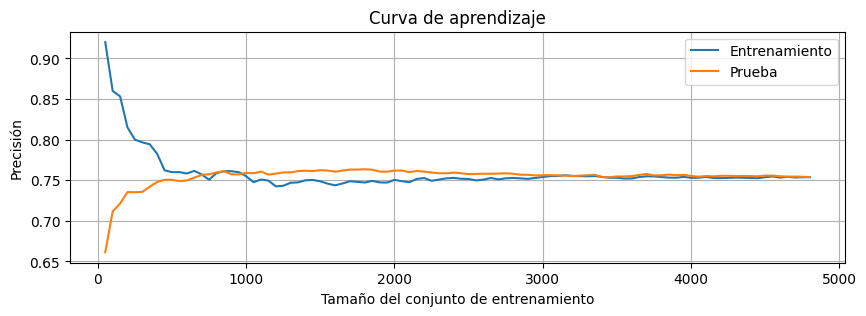

In [ ]:
#Curva de aprendizaje del nuevo modelo
train_scores = []
test_scores = []
train_sizes = []

for train_size in range(50,X_pca_estandarizada_10.shape[0],50):
    X_train_subset = X_pca_estandarizada_10.iloc[:train_size,:]
    y_train_subset = y_pca_estandarizada_10.iloc[:train_size]
    lda_filtrado = lda_filtrado.fit(X_train_subset,y_train_subset)
    train_scores.append(lda_filtrado.score(X_train_subset,y_train_subset))
    test_scores.append(lda_filtrado.score(X_pca_estandarizada_10,y_pca_estandarizada_10))
    train_sizes.append(train_size)

#grafica
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(train_sizes,train_scores,label='Entrenamiento')
ax.plot(train_sizes,test_scores,label='Prueba')
ax.set_xlabel('Tamaño del conjunto de entrenamiento')
ax.set_ylabel('Precisión')
ax.set_title('Curva de aprendizaje')
ax.legend()
ax.grid(True)
plt.show()

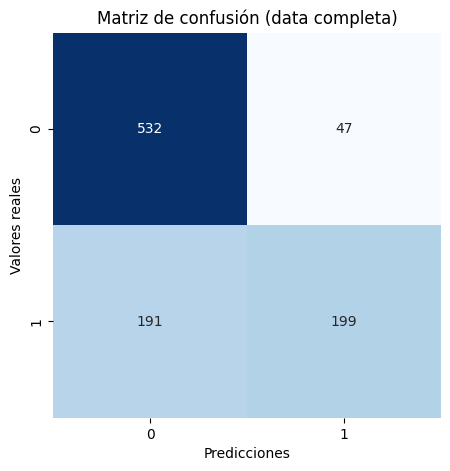

Precision del modelo: 0.7543859649122807
Tasa de falsos positivos: 0.1910569105691057
Tasa de falsos negativos: 0.2641770401106501


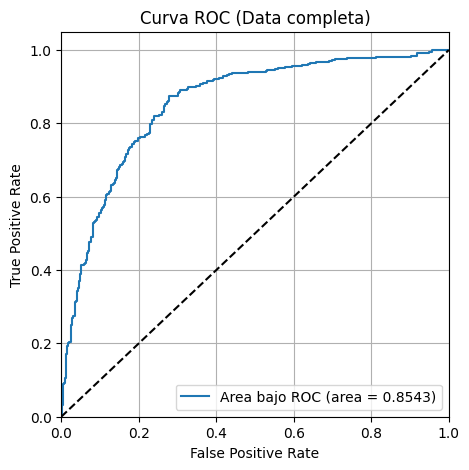

In [ ]:
#Dividimos la data en data de entrenamiento y prueba
X = data.drop(columns=['Numero Mop 96', 'Numero Mop 97', 'Numero Mop 99','respuesta'])
y = data.loc[:,'respuesta']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

#Entrenamos el modelo
lda_filtrado = lda_filtrado.fit(X_train,y_train)
#Prediccion
y_pred_filtrado = lda_filtrado.predict(X_test)

#Matriz de confusion
matriz_filtrada = confusion_matrix(y_true=y_test,y_pred=y_pred_filtrado)
#Mostramos matriz
fig,ax = plt.subplots(1,1,figsize=(5,5))
sns.heatmap(matriz_filtrada,annot=True,fmt='d',cmap='Blues',ax=ax,cbar=False)
ax.set_title('Matriz de confusión (data completa)')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Valores reales')
plt.show()

#precision de modelo
print('Precision del modelo:',lda_filtrado.score(X_test,y_test))
#Tasas de falsos positivos y negativos
falsos_positivos = matriz_filtrada[0,1]/(matriz_filtrada[0,1]+matriz_filtrada[1,1])
falsos_negativos = matriz_filtrada[1,0]/(matriz_filtrada[0,0]+matriz_filtrada[1,0])
print('Tasa de falsos positivos:',falsos_positivos)
print('Tasa de falsos negativos:',falsos_negativos)

#Curva roc
y_pred_proba_filtrado = lda_filtrado.predict_proba(X_test)[:,1]
fpr_filtrado,tpr_filtrado,thresholds_filtrado = roc_curve(y_test,y_pred_proba_filtrado)
auc_filtrado = roc_auc_score(y_test,y_pred_proba_filtrado)

#Grafica
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(fpr_filtrado,tpr_filtrado,label='Area bajo ROC (area = %0.4f)' % auc_filtrado)
ax.grid(True)
ax.plot([0,1],[0,1],'k--')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Curva ROC (Data completa)')
ax.legend(loc="lower right")
plt.show()




